In [1]:
##################################
#The notebook needed
%matplotlib inline 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

#!/usr/bin/env python
# coding: utf-8
import os
import sys
sys.path.append("/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/OASIS-master/")
sys.path.append("/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/")


from oasis.functions import deconvolve

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import h5py
import pdb
from importlib import reload  # Python 3.4+ only.
        
import pickle
import numpy, scipy.io
# import scipy.optimize as sop
# from autograd import elementwise_grad as egrad
# from mpl_toolkits.mplot3d import Axes3D
# import sklearn.discriminant_analysis as skd
# import autograd.scipy.special as ssp
# from autograd import jacobian

import size_contrast_analysis as sca
import scipy.stats as sst
from sim_utils import *
import pyute as ut
#reload(utils)
# make output path 
outputDir='/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/RsFiles/Running_VS_Stationary_Same_Cells/'
if not os.path.exists(outputDir):
    os.makedirs(outputDir)
    
    
# paths
dsbase ='/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/'



# dsnames = [dsbase+x+'_data_struct.hdf5' for x in ['pyr_l23','sst_l23','vip_l23']]


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/OASIS-master/oasis/functions.py:14: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  "just not the slower interior point methods we compared to in the papers.")


In [4]:
#######################
#parameters

nsize,ncontrast = 5,6
to_exclude = ['session_'+exptname for exptname in ['180714_M9053','180321_M7955', '180519_M8959', '180531_M8961',\
                                                 '180618_M8956','190202_M10075', '190620_M10619','200103_M0388']]
pval_cutoff=0.05 

#######################
#Files to analyze

for ctr_cutoff in [13,5,7,9,11,1]:
    for lt in [False,True]:

        if lt:
            dsnames = [dsbase+x+'_data_struct.hdf5' for x in ['pyr_l4','pyr_l23','pv_l23','sst_l23','vip_l23']]
        else:
            dsnames = [dsbase+x+'_data_struct.hdf5' for x in ['pyr_l4','pyr_l23','pv_l23','sst_l23','vip_l23']]




        ncelltypes = len(dsnames)
        selection = [None for itype in range(ncelltypes)]
        for itype in range(ncelltypes):
            with ut.hdf5read(dsnames[itype]) as ds:
                keylist = list(ds.keys())
                nexpt = len(keylist)
                to_keep = np.array([k not in to_exclude for k in keylist])
                selection[itype] = np.arange(nexpt)[to_keep]



        #########################################################
        #########################################################
        # Run

        rs =gen_rs(dsnames=dsnames,selection=selection,dcutoff=ctr_cutoff,pval_cutoff=pval_cutoff,slices=None,running=lt,fill_nans_under_cutoff=True)
        #r_spatial=gen_rspatial(dsnames=dsnames,selection=selection,dcutoffs=[0,5,10,15],pval_cutoff=pval_cutoff,slices=None,datafield='decon')
        #########################################################
        paramstring='-running_'+str(lt)+'-pval_cutoff_'+str(pval_cutoff)+'-ctrcutoff_'+str(ctr_cutoff)


        #Save rs

        with open(outputDir+'rs'+paramstring+'.pickle', 'wb') as handle:
            pickle.dump(rs, handle, protocol=pickle.HIGHEST_PROTOCOL)

        scipy.io.savemat(outputDir+'rs'+paramstring+'.mat', mdict={'rs': rs})    

#         #########################################################   
#         #########################################################
#         def sum_to_1(r):
#             R = r.reshape((r.shape[0],-1))
#             R = R/np.nansum(R,axis=1)[:,np.newaxis]
#             return R

#         RsFlatten = [[None,None] for i in range(len(rs))]

#         for iR,r in enumerate(rs):
#             for ialign in range(2):
#                 RsFlatten[iR][ialign] = sum_to_1(r[ialign])
#         #########################################################
#         #########################################################
#         #Save RsFlatten

#         with open(outputDir+'RsFlatten'+paramstring+'.pickle', 'wb') as handle:
#             pickle.dump(RsFlatten, handle, protocol=pickle.HIGHEST_PROTOCOL)

#         scipy.io.savemat(outputDir+'RsFlatten'+paramstring+'.mat', mdict={'RsFlatten': RsFlatten})            

#         #########################################################
#         #De flatten Rs
#         Rs_sum_to_1=np.zeros_like(rs)
#         for k in range(len(dsnames)): # this is the number of files we have
#             for l in range(1): #This is locomotion/ no locomotions
#                 ncells=RsFlatten[k][l].shape[0]
#                 Rs_sum_to_1[k][l]=np.reshape(RsFlatten[k][l], (ncells,5, 6)) 


#         with open(outputDir+'Rs_sum_to_1'+paramstring+'.pickle', 'wb') as handle:
#             pickle.dump(RsFlatten, handle, protocol=pickle.HIGHEST_PROTOCOL)

#         scipy.io.savemat(outputDir+'Rs_sum_to_1'+paramstring+'.mat', mdict={'Rs': Rs_sum_to_1})            




/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.8257142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.6034722222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190304_M10077" (9 members)>
decon
0.5597222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.14097222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190620_M10616" (9 members)>
decon
0.5431547619047619


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.6006944444444444


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190624_M10615" (8 members)>
decon
0.08234126984126984


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190627_M10616" (9 members)>
decon
0.7876984126984127
<HDF5 group "/session_190701_M10615" (8 members)>
decon
0.6691468253968254


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191212_M0762" (8 members)>
decon
0.8219246031746031
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.7321428571428571
<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.8307142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181213_M8536" (8 members)>
decon
0.03857142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.4142857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.44916666666666666
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.9472222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190130_M9667" (9 members)>
decon
0.19027777777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190131_M9355" (9 members)>
decon
0.9340277777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190208_M9355" (9 members)>
decon
0.9506944444444444


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190212_M8536" (9 members)>
decon
0.2465277777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191002_M0293" (8 members)>
decon
0.8462301587301587


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191108_M0403" (8 members)>
decon
0.9970238095238095


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (12 members)>
decon
1.0


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191220_M0589" (12 members)>
decon
0.9995039682539683
<HDF5 group "/session_191229_M0892" (12 members)>
decon
0.9995039682539683
<HDF5 group "/session_200102_M0892" (12 members)>
decon
0.9350198412698413
<HDF5 group "/session_200108_M0891" (12 members)>
decon
0.8606150793650794
<HDF5 group "/session_200620_M0891" (13 members)>
decon
0.44543650793650796


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200621_M0893" (13 members)>
decon
0.5277777777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.19083333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.15583333333333332


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.49166666666666664
<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.8525
<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.7892857142857143
<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.8571428571428571


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.9385714285714286
<HDF5 group "/session_191224_M0390" (11 members)>
decon
0.9404761904761905
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.011


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.275
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.0575


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.3383333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.3625


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.004166666666666667


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.9908333333333333
<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.9541666666666667
<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.16583333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190710_M0208" (9 members)>
decon
0.7237103174603174
<HDF5 group "/session_191215_M0385" (9 members)>
decon
0.8100198412698413
<HDF5 group "/session_200103_M0388" (9 members)>
decon
0.9191468253968254


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:163: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.nanmean(np.nanmean(arr[slicer],-1),-1)
/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.1742857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.39652777777777776


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190304_M10077" (9 members)>
decon
0.44027777777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.8590277777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190620_M10616" (9 members)>
decon
0.4568452380952381


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.3993055555555556


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190624_M10615" (8 members)>
decon
0.9176587301587301


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190627_M10616" (9 members)>
decon
0.2123015873015873


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190701_M10615" (8 members)>
decon
0.3308531746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191212_M0762" (8 members)>
decon
0.17807539682539683


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.26785714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.1692857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181213_M8536" (8 members)>
decon
0.9614285714285714
<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.5857142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.5508333333333333
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.05277777777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190130_M9667" (9 members)>
decon
0.8097222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190131_M9355" (9 members)>
decon
0.06597222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190208_M9355" (9 members)>
decon
0.049305555555555554


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190212_M8536" (9 members)>
decon
0.7534722222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191002_M0293" (8 members)>
decon
0.15376984126984128


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191108_M0403" (8 members)>
decon
0.002976190476190476


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (12 members)>
decon
0.0


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191220_M0589" (12 members)>
decon
0.000496031746031746
<HDF5 group "/session_191229_M0892" (12 members)>
decon
0.000496031746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200102_M0892" (12 members)>
decon
0.06498015873015874


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200108_M0891" (12 members)>
decon
0.13938492063492064


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200620_M0891" (13 members)>
decon
0.5545634920634921


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200621_M0893" (13 members)>
decon
0.4722222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.8091666666666667
<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.8441666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.5083333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.1475


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.21071428571428572


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.14285714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.06142857142857143
<HDF5 group "/session_191224_M0390" (11 members)>
decon
0.05952380952380952


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.989


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.725
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.9425
<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.6616666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.6375


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.9958333333333333
<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.009166666666666667


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.04583333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.8341666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190710_M0208" (9 members)>
decon
0.27628968253968256


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191215_M0385" (9 members)>
decon
0.18998015873015872


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200103_M0388" (9 members)>
decon
0.08085317460317461


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:163: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.nanmean(np.nanmean(arr[slicer],-1),-1)
/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.8257142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.6034722222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190304_M10077" (9 members)>
decon
0.5597222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.14097222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190620_M10616" (9 members)>
decon
0.5431547619047619


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.6006944444444444


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190624_M10615" (8 members)>
decon
0.08234126984126984


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190627_M10616" (9 members)>
decon
0.7876984126984127
<HDF5 group "/session_190701_M10615" (8 members)>
decon
0.6691468253968254


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191212_M0762" (8 members)>
decon
0.8219246031746031
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.7321428571428571
<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.8307142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181213_M8536" (8 members)>
decon
0.03857142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.4142857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.44916666666666666
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.9472222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190130_M9667" (9 members)>
decon
0.19027777777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190131_M9355" (9 members)>
decon
0.9340277777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190208_M9355" (9 members)>
decon
0.9506944444444444


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190212_M8536" (9 members)>
decon
0.2465277777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191002_M0293" (8 members)>
decon
0.8462301587301587


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191108_M0403" (8 members)>
decon
0.9970238095238095


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (12 members)>
decon
1.0


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191220_M0589" (12 members)>
decon
0.9995039682539683
<HDF5 group "/session_191229_M0892" (12 members)>
decon
0.9995039682539683
<HDF5 group "/session_200102_M0892" (12 members)>
decon
0.9350198412698413
<HDF5 group "/session_200108_M0891" (12 members)>
decon
0.8606150793650794
<HDF5 group "/session_200620_M0891" (13 members)>
decon
0.44543650793650796


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200621_M0893" (13 members)>
decon
0.5277777777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.19083333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.15583333333333332


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.49166666666666664
<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.8525
<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.7892857142857143
<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.8571428571428571


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.9385714285714286
<HDF5 group "/session_191224_M0390" (11 members)>
decon
0.9404761904761905
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.011


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.275
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.0575


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.3383333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.3625


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.004166666666666667


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.9908333333333333
<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.9541666666666667
<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.16583333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190710_M0208" (9 members)>
decon
0.7237103174603174
<HDF5 group "/session_191215_M0385" (9 members)>
decon
0.8100198412698413
<HDF5 group "/session_200103_M0388" (9 members)>
decon
0.9191468253968254


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:163: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.nanmean(np.nanmean(arr[slicer],-1),-1)
/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.1742857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.39652777777777776


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190304_M10077" (9 members)>
decon
0.44027777777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.8590277777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190620_M10616" (9 members)>
decon
0.4568452380952381


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.3993055555555556


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190624_M10615" (8 members)>
decon
0.9176587301587301


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190627_M10616" (9 members)>
decon
0.2123015873015873


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190701_M10615" (8 members)>
decon
0.3308531746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191212_M0762" (8 members)>
decon
0.17807539682539683


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.26785714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.1692857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181213_M8536" (8 members)>
decon
0.9614285714285714
<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.5857142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.5508333333333333
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.05277777777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190130_M9667" (9 members)>
decon
0.8097222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190131_M9355" (9 members)>
decon
0.06597222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190208_M9355" (9 members)>
decon
0.049305555555555554


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190212_M8536" (9 members)>
decon
0.7534722222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191002_M0293" (8 members)>
decon
0.15376984126984128


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191108_M0403" (8 members)>
decon
0.002976190476190476


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (12 members)>
decon
0.0


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191220_M0589" (12 members)>
decon
0.000496031746031746
<HDF5 group "/session_191229_M0892" (12 members)>
decon
0.000496031746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200102_M0892" (12 members)>
decon
0.06498015873015874


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200108_M0891" (12 members)>
decon
0.13938492063492064


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200620_M0891" (13 members)>
decon
0.5545634920634921


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200621_M0893" (13 members)>
decon
0.4722222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.8091666666666667
<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.8441666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.5083333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.1475


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.21071428571428572


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.14285714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.06142857142857143
<HDF5 group "/session_191224_M0390" (11 members)>
decon
0.05952380952380952


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.989


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.725
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.9425
<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.6616666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.6375


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.9958333333333333
<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.009166666666666667


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.04583333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.8341666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190710_M0208" (9 members)>
decon
0.27628968253968256


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191215_M0385" (9 members)>
decon
0.18998015873015872


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200103_M0388" (9 members)>
decon
0.08085317460317461


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:163: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.nanmean(np.nanmean(arr[slicer],-1),-1)
/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.8257142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.6034722222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190304_M10077" (9 members)>
decon
0.5597222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.14097222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190620_M10616" (9 members)>
decon
0.5431547619047619


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.6006944444444444


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190624_M10615" (8 members)>
decon
0.08234126984126984


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190627_M10616" (9 members)>
decon
0.7876984126984127
<HDF5 group "/session_190701_M10615" (8 members)>
decon
0.6691468253968254


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191212_M0762" (8 members)>
decon
0.8219246031746031
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.7321428571428571
<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.8307142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181213_M8536" (8 members)>
decon
0.03857142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.4142857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.44916666666666666
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.9472222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190130_M9667" (9 members)>
decon
0.19027777777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190131_M9355" (9 members)>
decon
0.9340277777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190208_M9355" (9 members)>
decon
0.9506944444444444


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190212_M8536" (9 members)>
decon
0.2465277777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191002_M0293" (8 members)>
decon
0.8462301587301587


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191108_M0403" (8 members)>
decon
0.9970238095238095


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (12 members)>
decon
1.0


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191220_M0589" (12 members)>
decon
0.9995039682539683
<HDF5 group "/session_191229_M0892" (12 members)>
decon
0.9995039682539683
<HDF5 group "/session_200102_M0892" (12 members)>
decon
0.9350198412698413
<HDF5 group "/session_200108_M0891" (12 members)>
decon
0.8606150793650794
<HDF5 group "/session_200620_M0891" (13 members)>
decon
0.44543650793650796


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200621_M0893" (13 members)>
decon
0.5277777777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.19083333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.15583333333333332


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.49166666666666664
<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.8525
<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.7892857142857143
<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.8571428571428571


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.9385714285714286
<HDF5 group "/session_191224_M0390" (11 members)>
decon
0.9404761904761905
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.011


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.275
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.0575


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.3383333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.3625


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.004166666666666667


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.9908333333333333
<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.9541666666666667
<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.16583333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190710_M0208" (9 members)>
decon
0.7237103174603174
<HDF5 group "/session_191215_M0385" (9 members)>
decon
0.8100198412698413
<HDF5 group "/session_200103_M0388" (9 members)>
decon
0.9191468253968254


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:163: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.nanmean(np.nanmean(arr[slicer],-1),-1)
/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.1742857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.39652777777777776


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190304_M10077" (9 members)>
decon
0.44027777777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.8590277777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190620_M10616" (9 members)>
decon
0.4568452380952381


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.3993055555555556


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190624_M10615" (8 members)>
decon
0.9176587301587301


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190627_M10616" (9 members)>
decon
0.2123015873015873


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190701_M10615" (8 members)>
decon
0.3308531746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191212_M0762" (8 members)>
decon
0.17807539682539683


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.26785714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.1692857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181213_M8536" (8 members)>
decon
0.9614285714285714
<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.5857142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.5508333333333333
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.05277777777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190130_M9667" (9 members)>
decon
0.8097222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190131_M9355" (9 members)>
decon
0.06597222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190208_M9355" (9 members)>
decon
0.049305555555555554


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190212_M8536" (9 members)>
decon
0.7534722222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191002_M0293" (8 members)>
decon
0.15376984126984128


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191108_M0403" (8 members)>
decon
0.002976190476190476


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (12 members)>
decon
0.0


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191220_M0589" (12 members)>
decon
0.000496031746031746
<HDF5 group "/session_191229_M0892" (12 members)>
decon
0.000496031746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200102_M0892" (12 members)>
decon
0.06498015873015874


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200108_M0891" (12 members)>
decon
0.13938492063492064


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200620_M0891" (13 members)>
decon
0.5545634920634921


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200621_M0893" (13 members)>
decon
0.4722222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.8091666666666667
<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.8441666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.5083333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.1475


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.21071428571428572


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.14285714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.06142857142857143
<HDF5 group "/session_191224_M0390" (11 members)>
decon
0.05952380952380952


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.989


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.725
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.9425
<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.6616666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.6375


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.9958333333333333
<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.009166666666666667


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.04583333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.8341666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190710_M0208" (9 members)>
decon
0.27628968253968256


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191215_M0385" (9 members)>
decon
0.18998015873015872


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200103_M0388" (9 members)>
decon
0.08085317460317461


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:163: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.nanmean(np.nanmean(arr[slicer],-1),-1)
/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.8257142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.6034722222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190304_M10077" (9 members)>
decon
0.5597222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.14097222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190620_M10616" (9 members)>
decon
0.5431547619047619


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.6006944444444444


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190624_M10615" (8 members)>
decon
0.08234126984126984


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190627_M10616" (9 members)>
decon
0.7876984126984127
<HDF5 group "/session_190701_M10615" (8 members)>
decon
0.6691468253968254


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191212_M0762" (8 members)>
decon
0.8219246031746031
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.7321428571428571
<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.8307142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181213_M8536" (8 members)>
decon
0.03857142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.4142857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.44916666666666666
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.9472222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190130_M9667" (9 members)>
decon
0.19027777777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190131_M9355" (9 members)>
decon
0.9340277777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190208_M9355" (9 members)>
decon
0.9506944444444444


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190212_M8536" (9 members)>
decon
0.2465277777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191002_M0293" (8 members)>
decon
0.8462301587301587


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191108_M0403" (8 members)>
decon
0.9970238095238095


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (12 members)>
decon
1.0


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191220_M0589" (12 members)>
decon
0.9995039682539683
<HDF5 group "/session_191229_M0892" (12 members)>
decon
0.9995039682539683
<HDF5 group "/session_200102_M0892" (12 members)>
decon
0.9350198412698413
<HDF5 group "/session_200108_M0891" (12 members)>
decon
0.8606150793650794
<HDF5 group "/session_200620_M0891" (13 members)>
decon
0.44543650793650796


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200621_M0893" (13 members)>
decon
0.5277777777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.19083333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.15583333333333332


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.49166666666666664
<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.8525
<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.7892857142857143
<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.8571428571428571


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.9385714285714286
<HDF5 group "/session_191224_M0390" (11 members)>
decon
0.9404761904761905
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.011


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.275
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.0575


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.3383333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.3625


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.004166666666666667


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.9908333333333333
<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.9541666666666667
<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.16583333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190710_M0208" (9 members)>
decon
0.7237103174603174
<HDF5 group "/session_191215_M0385" (9 members)>
decon
0.8100198412698413
<HDF5 group "/session_200103_M0388" (9 members)>
decon
0.9191468253968254


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:163: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.nanmean(np.nanmean(arr[slicer],-1),-1)
/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.1742857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.39652777777777776


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190304_M10077" (9 members)>
decon
0.44027777777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.8590277777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190620_M10616" (9 members)>
decon
0.4568452380952381


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.3993055555555556


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190624_M10615" (8 members)>
decon
0.9176587301587301


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190627_M10616" (9 members)>
decon
0.2123015873015873


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190701_M10615" (8 members)>
decon
0.3308531746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191212_M0762" (8 members)>
decon
0.17807539682539683


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.26785714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.1692857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181213_M8536" (8 members)>
decon
0.9614285714285714
<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.5857142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.5508333333333333
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.05277777777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190130_M9667" (9 members)>
decon
0.8097222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190131_M9355" (9 members)>
decon
0.06597222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190208_M9355" (9 members)>
decon
0.049305555555555554


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190212_M8536" (9 members)>
decon
0.7534722222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191002_M0293" (8 members)>
decon
0.15376984126984128


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191108_M0403" (8 members)>
decon
0.002976190476190476


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (12 members)>
decon
0.0


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191220_M0589" (12 members)>
decon
0.000496031746031746
<HDF5 group "/session_191229_M0892" (12 members)>
decon
0.000496031746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200102_M0892" (12 members)>
decon
0.06498015873015874


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200108_M0891" (12 members)>
decon
0.13938492063492064


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200620_M0891" (13 members)>
decon
0.5545634920634921


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200621_M0893" (13 members)>
decon
0.4722222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.8091666666666667
<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.8441666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.5083333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.1475


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.21071428571428572


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.14285714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.06142857142857143
<HDF5 group "/session_191224_M0390" (11 members)>
decon
0.05952380952380952


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.989


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.725
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.9425
<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.6616666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.6375


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.9958333333333333
<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.009166666666666667


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.04583333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.8341666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190710_M0208" (9 members)>
decon
0.27628968253968256


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191215_M0385" (9 members)>
decon
0.18998015873015872


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200103_M0388" (9 members)>
decon
0.08085317460317461


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:163: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.nanmean(np.nanmean(arr[slicer],-1),-1)
/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.8257142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.6034722222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190304_M10077" (9 members)>
decon
0.5597222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.14097222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190620_M10616" (9 members)>
decon
0.5431547619047619


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.6006944444444444


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190624_M10615" (8 members)>
decon
0.08234126984126984


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190627_M10616" (9 members)>
decon
0.7876984126984127
<HDF5 group "/session_190701_M10615" (8 members)>
decon
0.6691468253968254


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191212_M0762" (8 members)>
decon
0.8219246031746031
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.7321428571428571
<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.8307142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181213_M8536" (8 members)>
decon
0.03857142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.4142857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.44916666666666666
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.9472222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190130_M9667" (9 members)>
decon
0.19027777777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190131_M9355" (9 members)>
decon
0.9340277777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190208_M9355" (9 members)>
decon
0.9506944444444444


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190212_M8536" (9 members)>
decon
0.2465277777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191002_M0293" (8 members)>
decon
0.8462301587301587


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191108_M0403" (8 members)>
decon
0.9970238095238095


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (12 members)>
decon
1.0


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191220_M0589" (12 members)>
decon
0.9995039682539683
<HDF5 group "/session_191229_M0892" (12 members)>
decon
0.9995039682539683
<HDF5 group "/session_200102_M0892" (12 members)>
decon
0.9350198412698413
<HDF5 group "/session_200108_M0891" (12 members)>
decon
0.8606150793650794
<HDF5 group "/session_200620_M0891" (13 members)>
decon
0.44543650793650796


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200621_M0893" (13 members)>
decon
0.5277777777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.19083333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.15583333333333332


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.49166666666666664
<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.8525
<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.7892857142857143
<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.8571428571428571


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.9385714285714286
<HDF5 group "/session_191224_M0390" (11 members)>
decon
0.9404761904761905
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.011


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.275
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.0575


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.3383333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.3625


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.004166666666666667


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.9908333333333333
<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.9541666666666667
<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.16583333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190710_M0208" (9 members)>
decon
0.7237103174603174
<HDF5 group "/session_191215_M0385" (9 members)>
decon
0.8100198412698413
<HDF5 group "/session_200103_M0388" (9 members)>
decon
0.9191468253968254


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:163: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.nanmean(np.nanmean(arr[slicer],-1),-1)
/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.1742857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.39652777777777776


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190304_M10077" (9 members)>
decon
0.44027777777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.8590277777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190620_M10616" (9 members)>
decon
0.4568452380952381


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.3993055555555556


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190624_M10615" (8 members)>
decon
0.9176587301587301


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190627_M10616" (9 members)>
decon
0.2123015873015873


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190701_M10615" (8 members)>
decon
0.3308531746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191212_M0762" (8 members)>
decon
0.17807539682539683


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.26785714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.1692857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181213_M8536" (8 members)>
decon
0.9614285714285714
<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.5857142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.5508333333333333
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.05277777777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190130_M9667" (9 members)>
decon
0.8097222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190131_M9355" (9 members)>
decon
0.06597222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190208_M9355" (9 members)>
decon
0.049305555555555554


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190212_M8536" (9 members)>
decon
0.7534722222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191002_M0293" (8 members)>
decon
0.15376984126984128


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191108_M0403" (8 members)>
decon
0.002976190476190476


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (12 members)>
decon
0.0


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191220_M0589" (12 members)>
decon
0.000496031746031746
<HDF5 group "/session_191229_M0892" (12 members)>
decon
0.000496031746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200102_M0892" (12 members)>
decon
0.06498015873015874


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200108_M0891" (12 members)>
decon
0.13938492063492064


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200620_M0891" (13 members)>
decon
0.5545634920634921


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200621_M0893" (13 members)>
decon
0.4722222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.8091666666666667
<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.8441666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.5083333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.1475


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.21071428571428572


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.14285714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.06142857142857143
<HDF5 group "/session_191224_M0390" (11 members)>
decon
0.05952380952380952


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.989


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.725
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.9425
<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.6616666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.6375


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.9958333333333333
<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.009166666666666667


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.04583333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.8341666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190710_M0208" (9 members)>
decon
0.27628968253968256


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191215_M0385" (9 members)>
decon
0.18998015873015872


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200103_M0388" (9 members)>
decon
0.08085317460317461


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:163: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.nanmean(np.nanmean(arr[slicer],-1),-1)
/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.8257142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.6034722222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190304_M10077" (9 members)>
decon
0.5597222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.14097222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190620_M10616" (9 members)>
decon
0.5431547619047619


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.6006944444444444


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190624_M10615" (8 members)>
decon
0.08234126984126984


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190627_M10616" (9 members)>
decon
0.7876984126984127
<HDF5 group "/session_190701_M10615" (8 members)>
decon
0.6691468253968254


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191212_M0762" (8 members)>
decon
0.8219246031746031
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.7321428571428571
<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.8307142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181213_M8536" (8 members)>
decon
0.03857142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.4142857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.44916666666666666
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.9472222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190130_M9667" (9 members)>
decon
0.19027777777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190131_M9355" (9 members)>
decon
0.9340277777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190208_M9355" (9 members)>
decon
0.9506944444444444


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190212_M8536" (9 members)>
decon
0.2465277777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191002_M0293" (8 members)>
decon
0.8462301587301587


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191108_M0403" (8 members)>
decon
0.9970238095238095


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (12 members)>
decon
1.0


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191220_M0589" (12 members)>
decon
0.9995039682539683
<HDF5 group "/session_191229_M0892" (12 members)>
decon
0.9995039682539683
<HDF5 group "/session_200102_M0892" (12 members)>
decon
0.9350198412698413
<HDF5 group "/session_200108_M0891" (12 members)>
decon
0.8606150793650794
<HDF5 group "/session_200620_M0891" (13 members)>
decon
0.44543650793650796


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200621_M0893" (13 members)>
decon
0.5277777777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.19083333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.15583333333333332


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.49166666666666664
<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.8525
<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.7892857142857143
<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.8571428571428571


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.9385714285714286
<HDF5 group "/session_191224_M0390" (11 members)>
decon
0.9404761904761905
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.011


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.275
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.0575


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.3383333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.3625


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.004166666666666667


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.9908333333333333
<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.9541666666666667
<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.16583333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190710_M0208" (9 members)>
decon
0.7237103174603174
<HDF5 group "/session_191215_M0385" (9 members)>
decon
0.8100198412698413
<HDF5 group "/session_200103_M0388" (9 members)>
decon
0.9191468253968254


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:163: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.nanmean(np.nanmean(arr[slicer],-1),-1)
/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.1742857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.39652777777777776


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190304_M10077" (9 members)>
decon
0.44027777777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.8590277777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190620_M10616" (9 members)>
decon
0.4568452380952381


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.3993055555555556


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190624_M10615" (8 members)>
decon
0.9176587301587301


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190627_M10616" (9 members)>
decon
0.2123015873015873


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190701_M10615" (8 members)>
decon
0.3308531746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191212_M0762" (8 members)>
decon
0.17807539682539683


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.26785714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.1692857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181213_M8536" (8 members)>
decon
0.9614285714285714
<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.5857142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.5508333333333333
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.05277777777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190130_M9667" (9 members)>
decon
0.8097222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190131_M9355" (9 members)>
decon
0.06597222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190208_M9355" (9 members)>
decon
0.049305555555555554


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190212_M8536" (9 members)>
decon
0.7534722222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191002_M0293" (8 members)>
decon
0.15376984126984128


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191108_M0403" (8 members)>
decon
0.002976190476190476


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (12 members)>
decon
0.0


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191220_M0589" (12 members)>
decon
0.000496031746031746
<HDF5 group "/session_191229_M0892" (12 members)>
decon
0.000496031746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200102_M0892" (12 members)>
decon
0.06498015873015874


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200108_M0891" (12 members)>
decon
0.13938492063492064


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200620_M0891" (13 members)>
decon
0.5545634920634921


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200621_M0893" (13 members)>
decon
0.4722222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.8091666666666667
<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.8441666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.5083333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.1475


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.21071428571428572


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.14285714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.06142857142857143
<HDF5 group "/session_191224_M0390" (11 members)>
decon
0.05952380952380952


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.989


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.725
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.9425
<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.6616666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.6375


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.9958333333333333
<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.009166666666666667


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.04583333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.8341666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190710_M0208" (9 members)>
decon
0.27628968253968256


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191215_M0385" (9 members)>
decon
0.18998015873015872


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200103_M0388" (9 members)>
decon
0.08085317460317461


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:163: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.nanmean(np.nanmean(arr[slicer],-1),-1)
/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


# P-value comparison

/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.1742857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.39652777777777776


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190304_M10077" (9 members)>
decon
0.44027777777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.8590277777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190620_M10616" (9 members)>
decon
0.4568452380952381


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.3993055555555556


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190624_M10615" (8 members)>
decon
0.9176587301587301


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190627_M10616" (9 members)>
decon
0.2123015873015873


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190701_M10615" (8 members)>
decon
0.3308531746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191212_M0762" (8 members)>
decon
0.17807539682539683


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.26785714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.1692857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181213_M8536" (8 members)>
decon
0.9614285714285714
<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.5857142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.5508333333333333
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.05277777777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190130_M9667" (9 members)>
decon
0.8097222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190131_M9355" (9 members)>
decon
0.06597222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190208_M9355" (9 members)>
decon
0.049305555555555554


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190212_M8536" (9 members)>
decon
0.7534722222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191002_M0293" (8 members)>
decon
0.15376984126984128


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191108_M0403" (8 members)>
decon
0.002976190476190476


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (12 members)>
decon
0.0


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191220_M0589" (12 members)>
decon
0.000496031746031746
<HDF5 group "/session_191229_M0892" (12 members)>
decon
0.000496031746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200102_M0892" (12 members)>
decon
0.06498015873015874


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200108_M0891" (12 members)>
decon
0.13938492063492064


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200620_M0891" (13 members)>
decon
0.5545634920634921


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200621_M0893" (13 members)>
decon
0.4722222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.8091666666666667
<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.8441666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.5083333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.1475


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.21071428571428572


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.14285714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.06142857142857143
<HDF5 group "/session_191224_M0390" (11 members)>
decon
0.05952380952380952


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.989


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.725
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.9425
<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.6616666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.6375


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.9958333333333333
<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.009166666666666667


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.04583333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.8341666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190710_M0208" (9 members)>
decon
0.27628968253968256


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191215_M0385" (9 members)>
decon
0.18998015873015872


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200103_M0388" (9 members)>
decon
0.08085317460317461


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:163: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.nanmean(np.nanmean(arr[slicer],-1),-1)
/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.1742857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.39652777777777776


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190304_M10077" (9 members)>
decon
0.44027777777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.8590277777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190620_M10616" (9 members)>
decon
0.4568452380952381


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.3993055555555556


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190624_M10615" (8 members)>
decon
0.9176587301587301


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190627_M10616" (9 members)>
decon
0.2123015873015873


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190701_M10615" (8 members)>
decon
0.3308531746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191212_M0762" (8 members)>
decon
0.17807539682539683


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.26785714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.1692857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181213_M8536" (8 members)>
decon
0.9614285714285714
<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.5857142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.5508333333333333
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.05277777777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190130_M9667" (9 members)>
decon
0.8097222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190131_M9355" (9 members)>
decon
0.06597222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190208_M9355" (9 members)>
decon
0.049305555555555554


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190212_M8536" (9 members)>
decon
0.7534722222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191002_M0293" (8 members)>
decon
0.15376984126984128


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191108_M0403" (8 members)>
decon
0.002976190476190476


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (12 members)>
decon
0.0


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191220_M0589" (12 members)>
decon
0.000496031746031746
<HDF5 group "/session_191229_M0892" (12 members)>
decon
0.000496031746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200102_M0892" (12 members)>
decon
0.06498015873015874


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200108_M0891" (12 members)>
decon
0.13938492063492064


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200620_M0891" (13 members)>
decon
0.5545634920634921


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200621_M0893" (13 members)>
decon
0.4722222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.8091666666666667
<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.8441666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.5083333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.1475


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.21071428571428572


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.14285714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.06142857142857143
<HDF5 group "/session_191224_M0390" (11 members)>
decon
0.05952380952380952


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.989


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.725
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.9425
<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.6616666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.6375


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.9958333333333333
<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.009166666666666667


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.04583333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.8341666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190710_M0208" (9 members)>
decon
0.27628968253968256


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191215_M0385" (9 members)>
decon
0.18998015873015872


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200103_M0388" (9 members)>
decon
0.08085317460317461


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:163: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.nanmean(np.nanmean(arr[slicer],-1),-1)
/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.1742857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.39652777777777776


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190304_M10077" (9 members)>
decon
0.44027777777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.8590277777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190620_M10616" (9 members)>
decon
0.4568452380952381


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.3993055555555556


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190624_M10615" (8 members)>
decon
0.9176587301587301


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190627_M10616" (9 members)>
decon
0.2123015873015873


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190701_M10615" (8 members)>
decon
0.3308531746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191212_M0762" (8 members)>
decon
0.17807539682539683


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.26785714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.1692857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181213_M8536" (8 members)>
decon
0.9614285714285714
<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.5857142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.5508333333333333
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.05277777777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190130_M9667" (9 members)>
decon
0.8097222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190131_M9355" (9 members)>
decon
0.06597222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190208_M9355" (9 members)>
decon
0.049305555555555554


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190212_M8536" (9 members)>
decon
0.7534722222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191002_M0293" (8 members)>
decon
0.15376984126984128


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191108_M0403" (8 members)>
decon
0.002976190476190476


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (12 members)>
decon
0.0


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191220_M0589" (12 members)>
decon
0.000496031746031746
<HDF5 group "/session_191229_M0892" (12 members)>
decon
0.000496031746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200102_M0892" (12 members)>
decon
0.06498015873015874


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200108_M0891" (12 members)>
decon
0.13938492063492064


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200620_M0891" (13 members)>
decon
0.5545634920634921


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200621_M0893" (13 members)>
decon
0.4722222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.8091666666666667
<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.8441666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.5083333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.1475


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.21071428571428572


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.14285714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.06142857142857143
<HDF5 group "/session_191224_M0390" (11 members)>
decon
0.05952380952380952


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.989


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.725
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.9425
<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.6616666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.6375


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.9958333333333333
<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.009166666666666667


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.04583333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.8341666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190710_M0208" (9 members)>
decon
0.27628968253968256


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191215_M0385" (9 members)>
decon
0.18998015873015872


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200103_M0388" (9 members)>
decon
0.08085317460317461


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:163: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.nanmean(np.nanmean(arr[slicer],-1),-1)
/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.1742857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.39652777777777776


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190304_M10077" (9 members)>
decon
0.44027777777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.8590277777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190620_M10616" (9 members)>
decon
0.4568452380952381


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.3993055555555556


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190624_M10615" (8 members)>
decon
0.9176587301587301


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190627_M10616" (9 members)>
decon
0.2123015873015873


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190701_M10615" (8 members)>
decon
0.3308531746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191212_M0762" (8 members)>
decon
0.17807539682539683


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.26785714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.1692857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181213_M8536" (8 members)>
decon
0.9614285714285714
<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.5857142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.5508333333333333
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.05277777777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190130_M9667" (9 members)>
decon
0.8097222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190131_M9355" (9 members)>
decon
0.06597222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190208_M9355" (9 members)>
decon
0.049305555555555554


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190212_M8536" (9 members)>
decon
0.7534722222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191002_M0293" (8 members)>
decon
0.15376984126984128


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191108_M0403" (8 members)>
decon
0.002976190476190476


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (12 members)>
decon
0.0


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191220_M0589" (12 members)>
decon
0.000496031746031746
<HDF5 group "/session_191229_M0892" (12 members)>
decon
0.000496031746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200102_M0892" (12 members)>
decon
0.06498015873015874


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200108_M0891" (12 members)>
decon
0.13938492063492064


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200620_M0891" (13 members)>
decon
0.5545634920634921


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200621_M0893" (13 members)>
decon
0.4722222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.8091666666666667
<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.8441666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.5083333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.1475


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.21071428571428572


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.14285714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.06142857142857143
<HDF5 group "/session_191224_M0390" (11 members)>
decon
0.05952380952380952


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.989


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.725
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.9425
<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.6616666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.6375


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.9958333333333333
<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.009166666666666667


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.04583333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.8341666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190710_M0208" (9 members)>
decon
0.27628968253968256


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191215_M0385" (9 members)>
decon
0.18998015873015872


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200103_M0388" (9 members)>
decon
0.08085317460317461


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:163: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.nanmean(np.nanmean(arr[slicer],-1),-1)
/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.1742857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.39652777777777776


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190304_M10077" (9 members)>
decon
0.44027777777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.8590277777777777


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190620_M10616" (9 members)>
decon
0.4568452380952381


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.3993055555555556


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190624_M10615" (8 members)>
decon
0.9176587301587301


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190627_M10616" (9 members)>
decon
0.2123015873015873


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190701_M10615" (8 members)>
decon
0.3308531746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191212_M0762" (8 members)>
decon
0.17807539682539683


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.26785714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.1692857142857143


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181213_M8536" (8 members)>
decon
0.9614285714285714
<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.5857142857142857


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.5508333333333333
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.05277777777777778


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190130_M9667" (9 members)>
decon
0.8097222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190131_M9355" (9 members)>
decon
0.06597222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190208_M9355" (9 members)>
decon
0.049305555555555554


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190212_M8536" (9 members)>
decon
0.7534722222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191002_M0293" (8 members)>
decon
0.15376984126984128


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191108_M0403" (8 members)>
decon
0.002976190476190476


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (12 members)>
decon
0.0


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191220_M0589" (12 members)>
decon
0.000496031746031746
<HDF5 group "/session_191229_M0892" (12 members)>
decon
0.000496031746031746


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200102_M0892" (12 members)>
decon
0.06498015873015874


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200108_M0891" (12 members)>
decon
0.13938492063492064


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200620_M0891" (13 members)>
decon
0.5545634920634921


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200621_M0893" (13 members)>
decon
0.4722222222222222


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.8091666666666667
<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.8441666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.5083333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.1475


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.21071428571428572


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.14285714285714285


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.06142857142857143
<HDF5 group "/session_191224_M0390" (11 members)>
decon
0.05952380952380952


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.989


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.725
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.9425
<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.6616666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.6375


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.9958333333333333
<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.009166666666666667


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.04583333333333333


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.8341666666666666


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190710_M0208" (9 members)>
decon
0.27628968253968256


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191215_M0385" (9 members)>
decon
0.18998015873015872


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200103_M0388" (9 members)>
decon
0.08085317460317461


/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:163: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/Users/agos/Documents/Work/ColumbiaProjects/Data_NewDanFitting/Data/data_scripts/sim_utils.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.nanmean(np.nanmean(arr[slicer],-1),-1)
/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


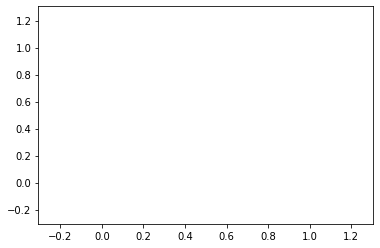

In [3]:
rs_new_pval_5pct =gen_rs(dsnames=dsnames,selection=selection,dcutoff=ctr_cutoff,pval_cutoff=0.05,slices=None,running=lt)
rs_new_pval_10pct =gen_rs(dsnames=dsnames,selection=selection,dcutoff=ctr_cutoff,pval_cutoff=0.1,slices=None,running=lt)
rs_new_pval_30pct =gen_rs(dsnames=dsnames,selection=selection,dcutoff=ctr_cutoff,pval_cutoff=0.3,slices=None,running=lt)
rs_new_pval_50pct =gen_rs(dsnames=dsnames,selection=selection,dcutoff=ctr_cutoff,pval_cutoff=0.5,slices=None,running=lt)
rs_new_pval_100pct =gen_rs(dsnames=dsnames,selection=selection,dcutoff=ctr_cutoff,pval_cutoff=1,slices=None,running=lt)




plt.plot([0,5,8,13,22,36],np.transpose(np.mean(rs_new_pval_5pct[0][0][:,2,:],axis=0)),'r');
plt.plot([0,5,8,13,22,36],np.transpose(np.mean(rs_new_pval_10pct[0][0][:,2,:],axis=0)),'b');
plt.plot([0,5,8,13,22,36],np.transpose(np.mean(rs_new_pval_30pct[0][0][:,2,:],axis=0)),'g');
plt.plot([0,5,8,13,22,36],np.transpose(np.mean(rs_new_pval_50pct[0][0][:,2,:],axis=0)),'m');
plt.plot([0,5,8,13,22,36],np.transpose(np.mean(rs_new_pval_100pct[0][0][:,2,:],axis=0)),'k');




